In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten,Dense,Dropout
from keras.layers import BatchNormalization
from keras.applications.xception import Xception as xcp
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
tr=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     validation_split=0.0
    )

te=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
#      validation_split=0.0
)

tr=tr.flow_from_directory(
    directory="D:\\Datasets IC\\litter_op\\train",
    target_size=(227,227),
    batch_size=20,
    class_mode='sparse',
    subset='training',
    seed=22
)

te=te.flow_from_directory(
    directory="D:\\Datasets IC\\litter_op\\val",
    target_size=(227,227),
    batch_size=20,
    class_mode='sparse',
    subset='training',
    seed=22
)

Found 5317 images belonging to 6 classes.
Found 1774 images belonging to 6 classes.


In [5]:
# tr=tf.keras.utils.image_dataset_from_directory(
#     directory=r"D:\Datasets IC\litter_op\train",
#     labels='inferred',
#     batch_size=20,
#     color_mode='rgb',
#     label_mode='int',
#     image_size=(227,227)
# )
# te=tf.keras.utils.image_dataset_from_directory(
#     directory="D:\\Datasets IC\\litter_op\\val",
#     labels='inferred',
#     batch_size=20,
#     color_mode='rgb',
#     label_mode='int',
#     image_size=(227,227),
# )

# def process(image,label):
#     image=tf.cast(image/255.,tf.float32)
#     return image,label
# trds=tr.map(process)
# valds=te.map(process)

In [6]:
base=xcp(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(227,227,3),
    pooling="max",
    classes=6
  )
base.trainable=False

In [7]:
model=Sequential()

model.add(base)
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(Dense(250,activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.4))
model.add(Dense(125,activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.4))
model.add(Dense(6,activation='softmax'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 500)               1024500   
                                                                 
 batch_normalization_4 (Batc  (None, 500)              2000      
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 250)               125250    
                                                                 
 batch_normalization_5 (Batc  (None, 250)              1000      
 hNormalization)                                        

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Xception is old results are better
Xceptr is new

In [12]:
from keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint
lr=ReduceLROnPlateau(monitor='val_loss',factor=0.1,min_lr=1e-10,cooldown=4)
es=EarlyStopping(monitor='val_loss',patience=12)
mc=ModelCheckpoint(filepath=r"D:\Models\XcepTr.h5",save_best_only=True,monitor='val_loss',save_freq='epoch',mode='min',save_weights_only=False)

In [13]:
det1=model.fit(tr,epochs=100,validation_data=te,callbacks=[lr,es,mc])

Epoch 1/100
266/266 [==============================] - 114s 369ms/step - loss: 0.7478 - accuracy: 0.7322 - val_loss: 0.5367 - val_accuracy: 0.8083 - lr: 0.0010
Epoch 2/100
266/266 [==============================] - 33s 126ms/step - loss: 0.4323 - accuracy: 0.8463 - val_loss: 0.5084 - val_accuracy: 0.8162 - lr: 0.0010
Epoch 3/100
266/266 [==============================] - 30s 112ms/step - loss: 0.3340 - accuracy: 0.8779 - val_loss: 0.5839 - val_accuracy: 0.7914 - lr: 0.0010
Epoch 4/100
266/266 [==============================] - 30s 114ms/step - loss: 0.2860 - accuracy: 0.8964 - val_loss: 0.5355 - val_accuracy: 0.8303 - lr: 0.0010
Epoch 5/100
266/266 [==============================] - 30s 113ms/step - loss: 0.2176 - accuracy: 0.9225 - val_loss: 0.5918 - val_accuracy: 0.8140 - lr: 0.0010
Epoch 6/100
266/266 [==============================] - 32s 119ms/step - loss: 0.1886 - accuracy: 0.9321 - val_loss: 0.4893 - val_accuracy: 0.8444 - lr: 0.0010
Epoch 7/100
266/266 [========================

In [12]:
# model.save(r"D:\Models\Normalized_Xception_End_weights.h5")

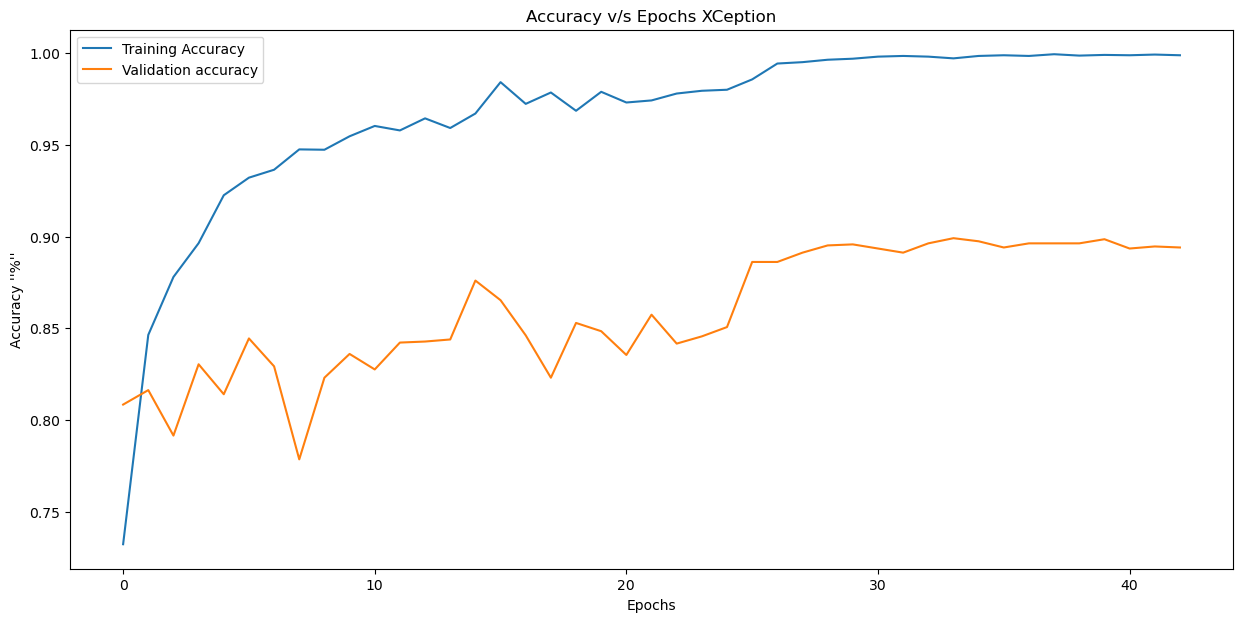

In [14]:
# plt.figure(figsize=(15,7))
# plt.plot(det1.history['accuracy'])
# plt.plot(det1.history['val_accuracy'])
# plt.xlabel('Epochs')
# plt.ylabel("Accuracy ''%''")
# plt.legend(['Training Accuracy','Validation accuracy'])
# plt.title('Accuracy v/s Epochs XCeption')
# plt.savefig('Xception_Acc.svg')

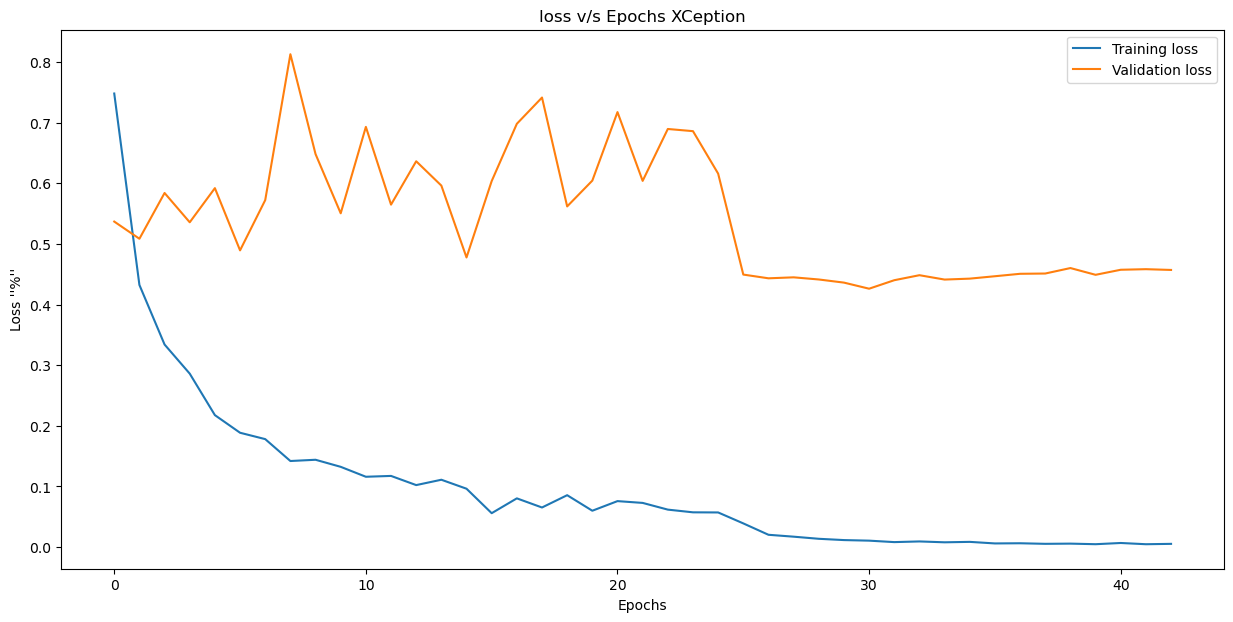

In [15]:
# plt.figure(figsize=(15,7))
# plt.plot(det1.history['loss'])
# plt.plot(det1.history['val_loss'])
# plt.xlabel('Epochs')
# plt.ylabel("Loss ''%''")
# plt.legend(['Training loss','Validation loss'])
# plt.title('loss v/s Epochs XCeption')
# plt.savefig('Xception_loss.svg')

In [20]:
# model.save(r'D:\Models\Inception_model_Trash_Classification_end_weights.h5')

In [16]:
model.evaluate(tr)


266/266 [==============================] - 78s 291ms/step - loss: 0.0100 - accuracy: 0.9989


[0.010019417852163315, 0.9988715648651123]

In [17]:
model.evaluate(te)

89/89 [==============================] - 21s 230ms/step - loss: 0.4570 - accuracy: 0.8940


[0.45702657103538513, 0.8940247893333435]

In [18]:
# m2=model
m2=tf.keras.models.load_model(r"D:\Models\Xception.h5")
# m2=load_model(r"D:\Models\Inception_model_Trash_Classification_end_weights.h5")

In [19]:
m2.evaluate(tr)
m2.evaluate(te)

89/89 [==============================] - 7s 78ms/step - loss: 0.3873 - accuracy: 0.8997


[0.38733893632888794, 0.8996617794036865]

1/1 [==============================] - 0s 26ms/step
[[1.9680117e-05 3.2509583e+01 5.6536126e-01 1.5348031e-01 2.4119715e+01
  4.2651844e+01]]


5

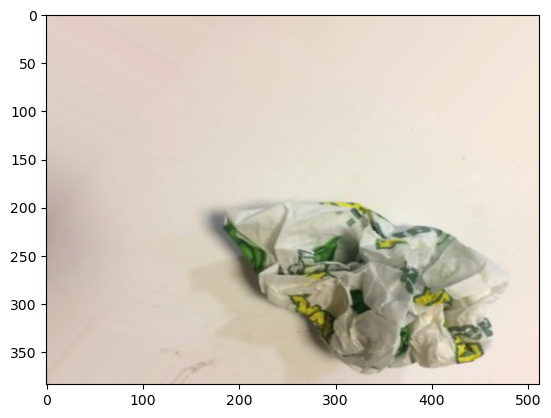

In [19]:
img=cv2.imread(r"D:\Datasets IC\litter_op\train\trash\trash0_20_9042.png")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

img=img/255.
img=cv2.resize(img,(227,227))
img=[img]
imar=np.array(img)
k=model.predict(imar)
print(k*100)
k=np.argmax(k)
k